In [17]:
import pandas as pd 
!pip install feature-engine

     |████████████████████████████████| 8.7MB 5.7MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [7]:
df=pd.read_csv('/content/data_no_null.csv',encoding='latin1')

In [8]:
df

,Unnamed: 0,loan_amnt,terms,Rate_of_intrst,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,State,debt_income_ratio,delinq_2yrs,inq_last_6mths,numb_credit,pub_rec,total revol_bal,total_credits,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,Emp_designation,Experience,mths_since_last_delinq,tot_curr_bal,tot_colle_amt
0,0,14350,36 months,19.19,E,E3,OWN,28700.0,Source Verified,debt_consolidation,FL,33.88,0.0,1.0,14.0,1.0,22515.0,28.0,f,1173.84,0.0,0.0,0.0,0.0,INDIVIDUAL,26th week,0.0,clerk,9 years,50.0,28699.0,0.0
1,1,4800,36 months,10.99,B,B4,MORTGAGE,65000.0,Source Verified,home_improvement,MD,3.64,0.0,1.0,6.0,0.0,7624.0,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,Human Resources Specialist,< 1 year,31.0,9974.0,0.0
2,2,10000,36 months,7.26,A,A4,OWN,45000.0,Not Verified,debt_consolidation,OH,18.42,0.0,0.0,5.0,0.0,10877.0,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,Driver,2 years,34.0,38295.0,65.0
3,3,15000,36 months,19.72,D,D5,RENT,105000.0,Not Verified,debt_consolidation,VA,14.97,0.0,2.0,10.0,0.0,13712.0,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135th week,0.0,Us office of Personnel Management,10+ years,46.0,55564.0,0.0
4,4,16000,36 months,10.64,B,B2,RENT,52000.0,Verified,credit_card,CA,20.16,0.0,0.0,11.0,0.0,35835.0,27.0,w,2296.41,0.0,0.0,0.0,0.0,INDIVIDUAL,96th week,0.0,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,31.0,47159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,887374,15000,36 months,6.49,A,A2,MORTGAGE,97250.0,Not Verified,credit_card,TX,12.46,0.0,0.0,12.0,0.0,12201.0,24.0,w,1180.32,0.0,0.0,0.0,0.0,INDIVIDUAL,83th week,0.0,Network administrator,1 year,77.0,143920.0,0.0
887375,887375,35000,60 months,25.89,G,G3,OWN,180000.0,Verified,debt_consolidation,NY,11.78,2.0,2.0,21.0,0.0,52584.0,33.0,f,6508.41,0.0,0.0,0.0,0.0,INDIVIDUAL,39th week,0.0,Credit Risk Analyst,1 year,19.0,772713.0,0.0
887376,887376,14000,60 months,17.51,E,E4,OWN,56000.0,Verified,home_improvement,NH,16.44,0.0,3.0,11.0,1.0,10948.0,25.0,f,3456.24,0.0,0.0,0.0,0.0,INDIVIDUAL,87th week,0.0,USPS/Nashua L&DC,10+ years,54.0,71973.5,0.0
887377,887377,20000,36 months,7.26,A,A4,MORTGAGE,100000.0,Source Verified,credit_card,MD,15.00,0.0,0.0,7.0,0.0,33599.0,11.0,w,766.84,0.0,0.0,0.0,0.0,INDIVIDUAL,35th week,0.0,Computer Engineer,< 1 year,33.0,291998.0,0.0


In [9]:
# list of columns not necessary for prediction
cols_to_drop=['Unnamed: 0','sub_grade','State','Emp_designation','last_week_pay']
# dropping the unnecessary columns
df=df.drop(columns=cols_to_drop,axis=1)

In [11]:
#df

In [12]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']

categorical

['terms',
 'grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'Experience']

In [14]:
#df[['A','B']] = df[['A','B']].replace([1, 3, 2], [3, 6, 7])
df[['purpose']] = df[['purpose']].replace(['car','house','renewable_energy','wedding','vacation','moving','medical','educational'],
                                              ['major_purchase','major_purchase','small_business','other','other','other','medical(or)education','medical(or)education'])

In [15]:
df.purpose.value_counts().sort_values()

medical(or)education      8963
small_business           10952
major_purchase           29847
home_improvement         51829
other                    55391
credit_card             206182
debt_consolidation      524215
Name: purpose, dtype: int64

In [19]:
from feature_engine.categorical_encoders import CountFrequencyCategoricalEncoder
count_enc = CountFrequencyCategoricalEncoder(
    encoding_method='frequency', # to do frequency ==> encoding_method='frequency'
    variables=categorical)

df_encoded = count_enc.fit_transform(df)

In [21]:
#count_enc.encoder_dict_

In [22]:
df_encoded.columns

Index(['loan_amnt ', 'terms', 'Rate_of_intrst', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'debt_income_ratio',
       'delinq_2yrs', 'inq_last_6mths', 'numb_credit', 'pub_rec',
       'total revol_bal', 'total_credits', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'Experience',
       'mths_since_last_delinq', 'tot_curr_bal', 'tot_colle_amt'],
      dtype='object')

In [23]:
X=df_encoded[['loan_amnt ',  'Rate_of_intrst', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'debt_income_ratio',
       'delinq_2yrs',  'numb_credit', 'pub_rec',
        'total_credits', 'initial_list_status',
       'total_rec_int',  'recoveries',
       'collection_recovery_fee', 
        'Experience',
       'mths_since_last_delinq', 'tot_curr_bal', 'tot_colle_amt']]
Y=df_encoded[['total revol_bal']]

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [26]:
# let's separate into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X  ,  # predictors
                                                    Y,  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((621165, 20), (266214, 20))

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [29]:
model = Sequential()

model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))


model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [32]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=700,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/700
19412/19412 [==============================] - 36s 2ms/step - loss: 0.7896 - val_loss: 0.6251
Epoch 2/700
19412/19412 [==============================] - 37s 2ms/step - loss: 0.7660 - val_loss: 0.5956
Epoch 3/700
19412/19412 [==============================] - 36s 2ms/step - loss: 0.7282 - val_loss: 0.6031
Epoch 4/700
19412/19412 [==============================] - 38s 2ms/step - loss: 0.6523 - val_loss: 0.5978
Epoch 5/700
19412/19412 [==============================] - 36s 2ms/step - loss: 0.6691 - val_loss: 0.5894
Epoch 6/700
19412/19412 [==============================] - 38s 2ms/step - loss: 0.6395 - val_loss: 0.5848
Epoch 7/700
19412/19412 [==============================] - 37s 2ms/step - loss: 0.6437 - val_loss: 0.6452
Epoch 8/700
19412/19412 [==============================] - 36s 2ms/step - loss: 0.6608 - val_loss: 0.5951
Epoch 9/700
19412/19412 [==============================] - 36s 2ms/step - loss: 0.6406 - val_loss: 0.6308
Epoch 10/700
19412/19412 [====================

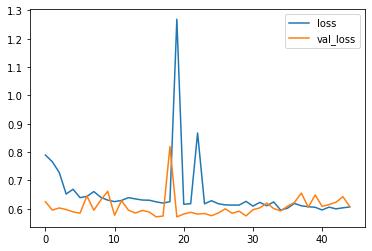

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import r2_score as rsq


In [41]:
nn_pred_train=sc_y.inverse_transform(model.predict(X_train))
nn_train_r2=rsq(sc_y.inverse_transform(y_train),nn_pred_train)            
nn_train_r2 

0.4220389082900906

In [42]:
nn_pred_test=sc_y.inverse_transform(model.predict(X_test))
nn_test_r2=rsq(sc_y.inverse_transform(y_test),nn_pred_test)            
nn_test_r2 

0.33690672633185126

In [45]:
import numpy as np
from sklearn import metrics
print(' train RMSE :', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_train),nn_pred_train)))
print(' test RMSE :', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_test),nn_pred_test)))

 train RMSE : 17350.212167016012
 test RMSE : 17488.09113079128


In [46]:
from keras.models import model_from_json


Using TensorFlow backend.


In [47]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [50]:
import keras



In [1]:
'''# load json and create model
json_file = open('/content/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/model.h5")
print("Loaded model from disk")'''

'# load json and create model\njson_file = open(\'/content/model.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n# load weights into new model\nloaded_model.load_weights("/content/model.h5")\nprint("Loaded model from disk")'